In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.optimize import minimize

In [ ]:
# function of two variables 
def func(x,y):
    return 4 * np.cos(x+y) + 1/3 * (x**2 + y**2) 

In [ ]:
# partial derivative
def dfdx(x,y):
    return 2 * x / 3 - 4 * np.sin(x+y)

In [ ]:
# partial derivative
def dfdy(x,y):
    return 2 * y / 3 - 4 * np.sin(x+y)

In [ ]:
# gradient vector [df/dx, df/dy]
def grad_vector(x, y):
    return np.array([dfdx(x,y), dfdy(x,y)])

In [ ]:
# Gradient descent (GD)
def grad_descent(function, init_point,learn_rate):
    
    eps = 0.0001
    grad_iter = 1

    iter = []
    diff = []

    f = function(init_point[0], init_point[1])

    x_next = np.subtract(init_point, learn_rate*grad_vector(init_point[0], init_point[1]))
    
    while np.linalg.norm(np.subtract(x_next,init_point)) > eps:
        diff.append(function(init_point[0], init_point[1]) - function(x_next[0], x_next[1]))
        iter.append(grad_iter)
        init_point = x_next
        x_next = init_point - learn_rate*grad_vector(init_point[0], init_point[1])
        grad_iter += 1

    return (x_next, diff, iter)

In [ ]:
# Adam's optimization algorithm
def adam(function, init_point, lr=0.02, beta1=0.9, beta2=0.999, eps=1e-8):
    """
        lr - learning rate
        beta1 - factor for average gradient
        beta2 - factor for average squared gradient
    """
	
    init_point = np.array(init_point)
    
    # initialize first and second moments
    first_moment = np.array([0, 0])
    second_moment = np.array([0, 0])
    
    differ = []
    iter = []
    counter = 1
    
    while True:
        f = function(init_point[0], init_point[1])
     
        grad = grad_vector(init_point[0], init_point[1])

        first_moment = beta1 * first_moment + (1 - beta1) * grad
        second_moment = beta2 * second_moment + (1 - beta2) * np.square(grad)

        first_moment_cor = first_moment / (1 - np.power(beta1, counter))
        second_moment_cor = second_moment / (1 - np.power(beta2, counter))

        init_point = init_point - lr * first_moment_cor / (np.sqrt(second_moment_cor) + eps)
        
        if np.abs(f - function(init_point[0], init_point[1])) >= 1e-12:
            differ.append(f - function(init_point[0], init_point[1]))
            iter.append(counter)
            counter += 1
        else:
            return (differ, iter, func, init_point)

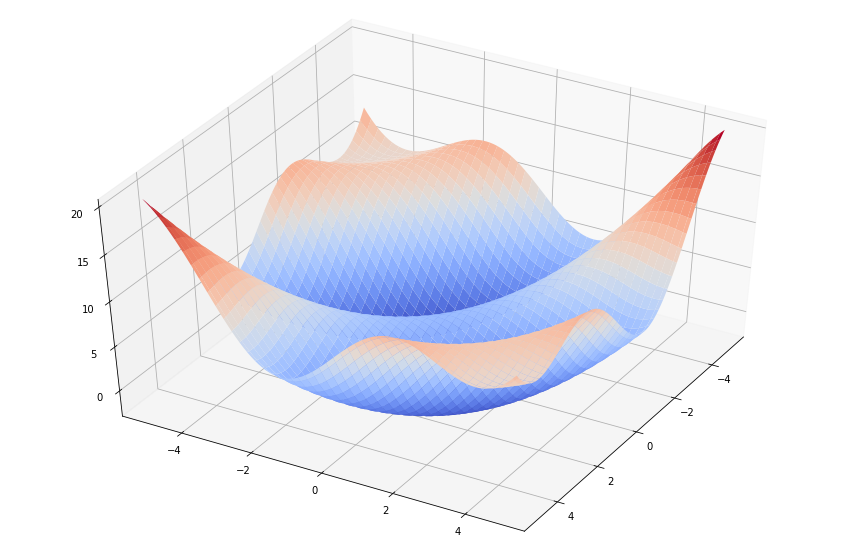

In [ ]:
# plotting the graph

# 3D plot
fig = plt.figure(figsize=[15, 10])
ax = fig.gca(projection='3d')

# ang of view
ax.view_init(45, 30)

#generate data for plot
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = func(X, Y)

bounds = np.asarray([[-5.0, 5.0], [-5.0, 5.0]])

# plot data
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
plt.show()

In [ ]:
var, diff, iters = grad_descent(func, np.array([0,2]), 0.2)
print('Gradient descent')
print(f'Minimum (x,y): ({var[0]}, {var[1]})')
print(f'Number of iterations: {iters[len(iters) - 1]}')
print(f'Z(x,y) = {func(var[0], var[1])}')

Gradient descent
Minimum (x,y): (1.4484127048180522, 1.4492938409924039)
Number of iterations: 53
Z(x,y) = -2.4821769516675225


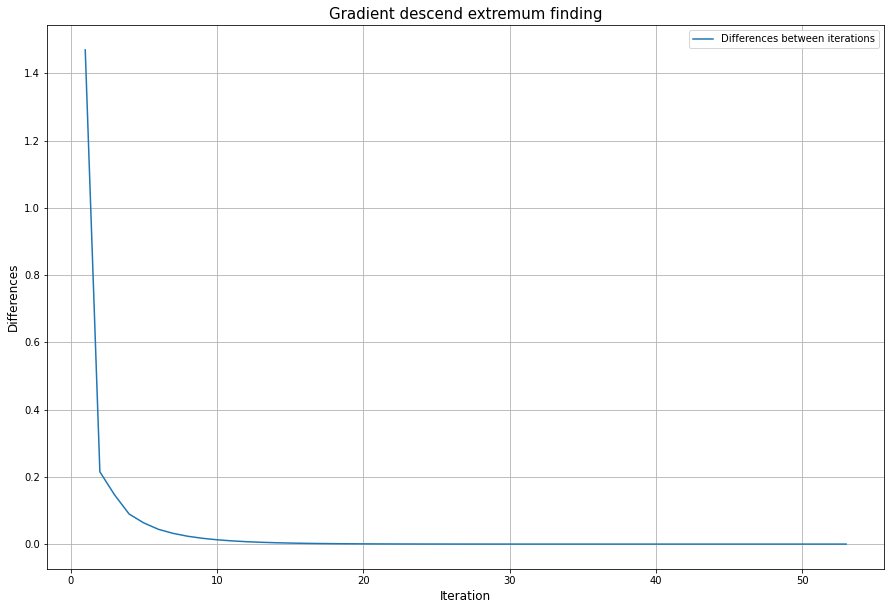

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(iters, diff, label="Differences between iterations")
plt.title('Gradient descend extremum finding', fontsize=15)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Differences', fontsize=12)
plt.legend()
plt.grid(True)

In [ ]:
diff, iter, f, var = adam(func, [0, 2])
print("Adam's optimization algorithm")
print(f"Minimum (x,y): ({var[0]}, {var[1]})")
print(f"Number of iterations: {iter[len(iter) - 1]}")
print(f'Z(x,y) = {func(var[0], var[1])}')

Adam's optimization algorithm
Minimum (x,y): (1.4488500863681157, 1.448856321987215)
Number of iterations: 450
Z(x,y) = -2.482177081061162


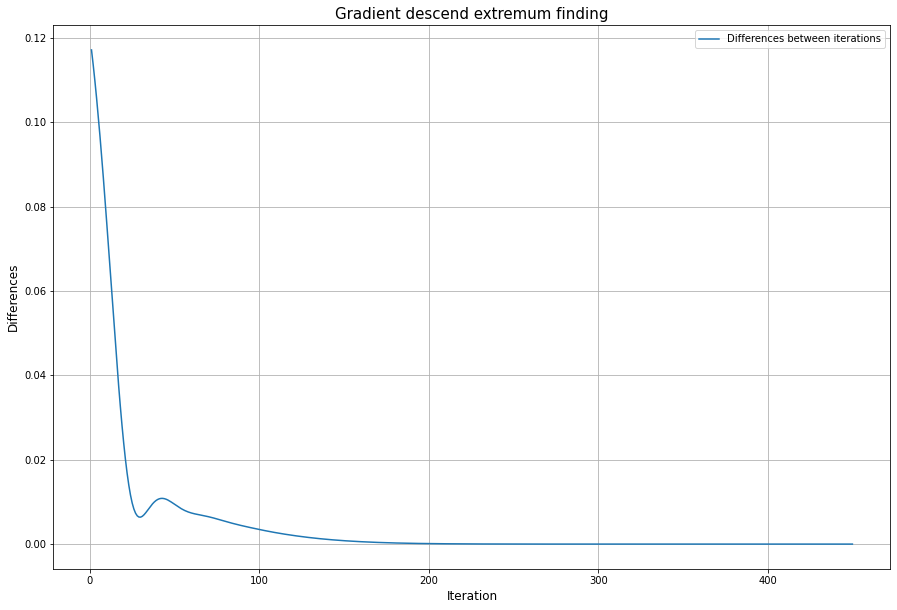

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(iter, diff, label="Differences between iterations")
plt.title('Gradient descend extremum finding', fontsize=15)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Differences', fontsize=12)
plt.legend()
plt.grid(True)